In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from read_csv_data import *
from my_filter import *
from my_load_data import * 
from my_predict import *
from my_util import *

path_root = './data/'

# load data
Y_raw, Y_drug_id, Y_drug_name, tissue_id_list, tissue_name_list, dataset_id, X_gene_symbol_list, X_oncogene_idx = my_load_data(path_root)
X_gene_ENSG_list = my_load_ENSG(path_root)

sns.set()

In [7]:
# load X_raw (gene expression of cell lines)

X_raw = my_load_data_X_tpm(path_root)

print( 'X_raw.shape = ', X_raw.shape )

X_raw.shape =  (1047, 37279)


In [10]:
select_dataset = 0
dataset_train_ids = [1,2]
dataset_test_ids = [1,2]    # 1 = CCLE, 2 = GDSC; 0 = mixing CCLE and GDSC


# Selected the tissue to analyze
tissue_selected_id_list_list = [[5]]  # 5 = Breast
#tissue_selected_id_list_list = [[14]]  # 14 = Colorectal 
#tissue_selected_id_list_list = [[16]]  # 16 = Lung

# drug list (GDSC id)
'''drug_id_list_list =  [1003, 1004, 1005, 1006, 1007, 1010, 1011, 1012, 1013, 1017, 
1021, 1022, 1025, 1030, 1032, 1034, 1036, 1038, 1042, 1046, 
1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1057, 1058, 
1059, 1060, 1068, 1073, 1079, 1080, 1083, 1084, 1085, 1086, 
1088, 1089, 1091, 1093, 1096, 1129, 1131, 1168, 1177, 1179, 
1180, 1190, 1191, 1192, 1194, 1199, 1200, 1237, 1239, 1248, 
1249, 1250, 1259, 1268, 1372, 1373, 1375, 1401, 1428, 1441, 
1449, 1463, 1507, 1510, 1511, 1512, 1529, 1549, 1553, 1557, 
1558, 1559, 1560, 1561, 1563, 1564, 1576, 1578, 1593, 1594, 
1598, 1613, 1614, 1615, 1617, 1618, 1620, 1621, 1622, 1624, 
1625, 1626, 1627, 1629, 1630, 1631, 1632, 1634, 1635, 1706, 
1708, 1709, 1712, 1713, 1714, 1716, 1718, 1720, 1730, 1732, 
1733, 1734, 1736, 1738, 1739, 1786, 1799, 1802, 1804, 1806, 
1807, 1808, 1809, 1810, 1811, 1813, 1814, 1816, 1818, 1819, 
1825, 1827, 1830, 1835, 1838, 1849, 1852, 1853, 1854, 1855, 
1862, 1866, 1873, 1908, 1909, 1910, 1911, 1912, 1913, 1915, 
1916, 1917, 1918, 1919, 1922, 1924, 1925, 1926, 1927, 1928, 
1930, 1931, 1932, 1933, 1936, 1939, 1940, 1941, 1996, 1997, 
1998, 2040, 2043, 2044, 2045, 2046, 2047, 2048, 2096, 2106, 
2107, 2109, 2110, 2111, 2169, 2170, 2171, 2172]  # all 198 drugs in GDSC'''
drug_id_list_list = [1005, 1073, 1080, 1512]  # 1005=Cisplatin, 1073=5FU, 1080=Paclitaxel, 1512=Cyclophosphamide



# parameters for training
C_cv_fold = 5     # N-fold cross valiadation
C_drug_sens_threshold = -1   # threshold of z-score to distinguish drug-sensitive and drug-resistant

flag_oncogene = False      # if True, select genes in 723 oncogenes 
flag_tpm_normalize = True  # if True, TPM normalize the gene expression before prediction


the_brutal_idx = []        # if not empty, only genes in this list will be selected and other genes will be ignored 
if len(the_brutal_idx)>0:
    print('Only len(the_brutal_idx)=%d genes will be screened'%(len(the_brutal_idx)))

drug name: Cisplatin ; drug id: 1005

drug_id = 1005  drug_name = Cisplatin
selecting dataset 1   X_cell_idx: (603,)
selecting tissue;   X_cell_idx: (44,)
after expression level filter, X: (40, 11440)
after correlation filter, X: (40, 1527)
after Fisher filter, X: (40, 600)

drug_id = 1005  drug_name = Cisplatin
selecting dataset 2   X_cell_idx: (444,)
selecting tissue;   X_cell_idx: (11,)
after expression level filter, X: (11, 11491)
after correlation filter, X: (11, 5364)
after Fisher filter, X: (11, 600)

Screened candidate genes and their scores:
0	33287	TFF3	200686469.50
1	12542	KRT5	200683028.15
2	33285	TFF1	200549762.16
3	3037	CACNG4	200495057.02
4	3268	CBR1	200463799.86
5	11945	JAG1	200428545.98
6	34779	TSPYL5	200418682.48
7	9489	GREB1	200409798.83
8	18169	MPP7	200398871.19
9	23415	PRRT3	200392924.74
.....................
[best1] C_selected_para_cnt=20, best_C_neighbor_k=12, AUC=0.839844
[best2] C_selected_para_cnt=19, best_C_neighbor_k=11, AUC=0.832031

drug_id = 1005  drug_na

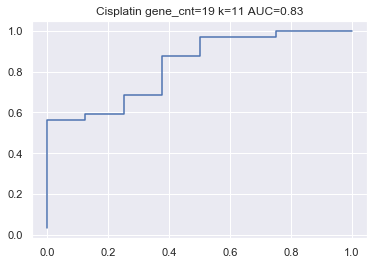


drug_id = 1005  drug_name = Cisplatin
selecting dataset 2   X: (444, 19) , Y: (444,)
selecting tissue;  [5]  X: (11, 19) , Y: (11,)
remove cell without drug data: X: (11, 19) , Y: (11,)
AUC= 0.8500000000000001 ; RMSE= 0.8777790578989357


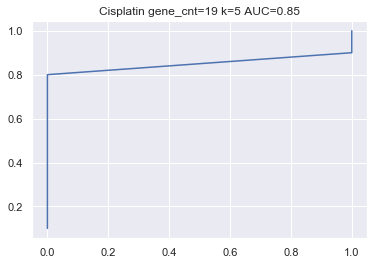

drug name: 5-Fluorouracil ; drug id: 1073

drug_id = 1073  drug_name = 5-Fluorouracil
selecting dataset 1   X_cell_idx: (603,)
selecting tissue;   X_cell_idx: (44,)
after expression level filter, X: (40, 11440)
after correlation filter, X: (40, 1788)
after Fisher filter, X: (40, 600)

drug_id = 1073  drug_name = 5-Fluorouracil
selecting dataset 2   X_cell_idx: (444,)
selecting tissue;   X_cell_idx: (11,)
after expression level filter, X: (11, 11491)
after correlation filter, X: (11, 5079)
after Fisher filter, X: (11, 600)

Screened candidate genes and their scores:
0	33287	TFF3	200686469.75
1	33285	TFF1	200549762.15
2	2314	BPIFB1	200548476.57
3	8581	FXYD5	200440758.63
4	12964	LBH	200432526.34
5	36502	ZG16B	200424232.36
6	18169	MPP7	200398871.87
7	21531	PACSIN1	200390485.04
8	3559	CCNO	200383729.55
9	11697	INPP4B	200372613.85
.....................
[best1] C_selected_para_cnt=10, best_C_neighbor_k=1, AUC=0.645833
[best2] C_selected_para_cnt=10, best_C_neighbor_k=1, AUC=0.645833

drug_id 

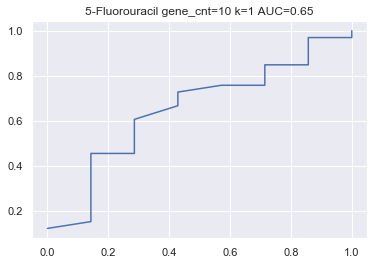


drug_id = 1073  drug_name = 5-Fluorouracil
selecting dataset 2   X: (444, 10) , Y: (444,)
selecting tissue;  [5]  X: (11, 10) , Y: (11,)
remove cell without drug data: X: (11, 10) , Y: (11,)
AUC= 0.6458333333333334 ; RMSE= 1.4934698686199597


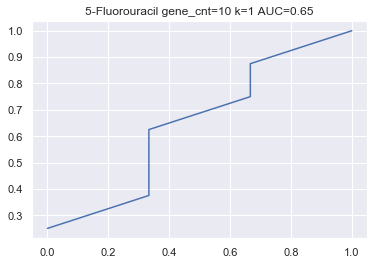

drug name: Paclitaxel ; drug id: 1080

drug_id = 1080  drug_name = Paclitaxel


In [ ]:
## Screen the genes for prediction !

fo = open('./output/output_auc.txt', 'a')    # save AUC results
fo.write('[info]\t%d\t%d\t%d\n' %(dataset_train_ids[0], dataset_test_ids[0], tissue_selected_id_list_list[0][0]))
fo.close()

fo = open('./output/output_gene.txt', 'a')   # save gene lists
fo.write('[info]\t%d\t%d\t%d\n' %(dataset_train_ids[0], dataset_test_ids[0], tissue_selected_id_list_list[0][0]))
fo.close()


for iii_ in range(len(drug_id_list_list)):
    
    # drug information
    if type(drug_id_list_list[iii_]) is list:
        drug_id_list = drug_id_list_list[iii_]
    else:
        drug_id_list = [drug_id_list_list[iii_]]
    Y_drug_idx = [ 0 for i in range(len(drug_id_list))]
    for i in range(len(drug_id_list)):
        drug_id = drug_id_list[i]
        Y_drug_idx[i] = np.argwhere(Y_drug_id==drug_id)[0][0]
        print('drug name:',Y_drug_name[Y_drug_idx[i]],'; drug id:',drug_id)

    ###########################################
    X_idx_all_list = []        # screened gene idx
    X_idx_score_all_list = []  # score of these screened genes

    for select_dataset in dataset_train_ids:  # Specify the database
        for tissue_selected_id_list in tissue_selected_id_list_list: # Specify the tissue

            X_idx_all = np.array([])        # screened gene idx
            X_idx_score_all = np.array([])  # score of these screened genes

            for i in range(len(Y_drug_idx)):  # Specify the drug
                drug_idx = Y_drug_idx[i]
                drug_id = Y_drug_id[drug_idx]
                drug_name = Y_drug_name[drug_idx]

                print()
                print('drug_id =', drug_id, ' drug_name =', drug_name)

                X = X_raw.copy()
                X = np.log(1+X)     
                X_idx = np.array([i for i in range(X.shape[1])])
                Y = Y_raw[drug_idx, :]
                    
                # specified database, and tissue
                X_cell_idx = my_data_selection_2(dataset_id, select_dataset, tissue_id_list, tissue_selected_id_list)
                # remove cell lines without drug info
                X_cell_idx = X_cell_idx[~np.isnan(Y[X_cell_idx])]
                
                # Cell lines with specified database, and tissue
                X = X[X_cell_idx, :]
                Y = Y[X_cell_idx]


                if Y.shape[0]<5:
                    print('[Warning] not enough data points (%d)'%(Y.shape[0]))
                    continue

                # re-normalize Y (z-score) to ensure mean=0 and std=1
                Y = my_normalize(Y)
                Y[Y<-2] = -2
                Y[Y>2] = 2
                
                
                ########################################### Filters
                
                ###### Brutal selection: only genes in `the_brutal_idx` will be selected and other genes will be ignored 
                if len(the_brutal_idx)>0:
                    Filter_idx = get_repeating_idx_filter(X_idx, the_brutal_idx)
                    X = X[:, Filter_idx]
                    X_idx = X_idx[Filter_idx]
                    print('after brutal selection, X:', X.shape)

                ###### Oncogene seletion: only oncogenes will be selected and other genes will be ignored 
                if flag_oncogene:
                    Filter_idx = get_repeating_idx_filter(X_idx, X_oncogene_idx)
                    X = X[:, Filter_idx]
                    X_idx = X_idx[Filter_idx]
                    print('after oncogene selection, X:', X.shape)
   
                ###### Expression level filter: mean gene expression cannot be too low
                Filter_idx = np.argwhere(np.mean(X, axis=0)>1).T[0]
                X = X[:, Filter_idx]
                X_idx = X_idx[Filter_idx]
                print('after expression level filter, X:', X.shape)

                ###### Correlation filter: correlation coefficient between gene and zscore cannot be too low; it is one of the linear filter;
                Filter_idx = get_corr_filter_th(X, Y, 0.25)
                X = X[:, Filter_idx]
                X_idx = X_idx[Filter_idx]
                print('after correlation filter, X:',X.shape)
                
                ###### Fisher filter: compare the Fisher's discriminant between cell lines with the highest and lowest 15% zscore; it is one of the dispersion filter;
                Filter_idx, Filter_score = get_topbottom_fisher_filter(X, Y, 600, 0.15)
                X = X[:, Filter_idx]
                X_idx = X_idx[Filter_idx]
                print('after Fisher filter, X:',X.shape)

                ###### save
                X_idx_all = np.concatenate([X_idx_all, X_idx])
                X_idx_score_all = np.concatenate([X_idx_score_all, Filter_score])

            X_idx_all_list.append(X_idx_all)
            X_idx_score_all_list.append(X_idx_score_all)

    ##############################################################################################
    # Calculate the score of each gene
    
    score_list = np.zeros(X_raw.shape[1]) 
    score_base = 0  # `base score` guarantees that the priority of the sort is the number of occurrences
    for X_idx_score_all in X_idx_score_all_list:
        if len(X_idx_score_all)>0:
            score_base = max(score_base, max(abs(X_idx_score_all)))
    if score_base==0:
        print('[Warning] score_base==0, stop processing')
        continue
    score_base = 10**(math.ceil(math.log(score_base, 10) + 2))
    
    # Sum the scores of each gene
    for ii in range(len(X_idx_all_list)):
        X_idx_all       = X_idx_all_list[ii]
        X_idx_score_all = X_idx_score_all_list[ii]
        for i in range(len(X_idx_all)):
            idx = int(X_idx_all[i])
            score_list[idx] = score_list[idx] + score_base + abs(X_idx_score_all[i])
    
    # sort by their score
    score_list_sorted_idx = sorted(range(X_raw.shape[1]), key=lambda k: abs(score_list[k]), reverse=True)
    X_idx = score_list_sorted_idx
    
    # remove those score==0
    for i in range(len(X_idx)):
        if score_list[X_idx[i]]==0:
            X_idx = X_idx[:i]
            break

    print()
    print('Screened candidate genes and their scores:')
    for i in range(min(10, len(X_idx))):
        print('%d\t%d\t%s\t%.2f'%(i, X_idx[i], X_gene_symbol_list[X_idx[i]], score_list[X_idx[i]]))
        

    # Save candidates to X_idx_raw
    X_idx_raw = X_idx


    ##############################################################################################
    # Enumurate for good performance (AUC) on cross-validation 

    best_best_mean_auc_score = 0
    best_C_selected_para_cnt = 1
    
    best_C_selected_para_cnt, best_best_C_neighbor_k = \
    get_knn_para_by_bruteforce(X_idx_raw, X_raw, Y_raw, Y_drug_idx, C_cv_fold, C_drug_sens_threshold, \
                               dataset_test_ids, dataset_id, tissue_id_list, tissue_selected_id_list_list, \
                              flag_tpm_normalize, 30, 10, True, 0.02)
    
    ##############################################################################################
    # predict and display the result

    # Screened genes with good performance and refined parameters
    C_selected_para_cnt = best_C_selected_para_cnt
    C_neighbor_k = best_best_C_neighbor_k
    X_idx = X_idx_raw[:C_selected_para_cnt]  

    auc_score_list = []

    for select_dataset in dataset_test_ids:  # specify dataset
        for tissue_selected_id_list in tissue_selected_id_list_list: # Specify the tissue
            for i in range(len(Y_drug_idx)):   # specify drug

                # 读取药物
                drug_idx = Y_drug_idx[i]
                drug_id = Y_drug_id[drug_idx]
                drug_name = Y_drug_name[drug_idx]
                print(); print('drug_id =', drug_id, ' drug_name =', drug_name)

                # 加载X,Y
                X = X_raw[:, X_idx]  # screened genes
                #X = X_raw[:, X_oncogene_idx]  # oncogenes
                #X = X_raw.copy()  # all genes

                X = np.log(1+X)
                Y = Y_raw[drug_idx, :]

                # select cell lines with specified 
                X,Y = my_data_selection(X, Y, dataset_id, select_dataset, tissue_id_list, tissue_selected_id_list, True)
                # re-normalize Y (z-score) to ensure mean=0 and std=1
                Y = my_normalize(Y)

                # cross-validation 
                y_pred, auc_score, mse_score, fpr, tpr = get_knn_cv_predict_results(X, Y, C_neighbor_k, C_cv_fold, C_drug_sens_threshold, True, drug_name, flag_tpm_normalize)
                if not math.isnan(auc_score):
                    auc_score_list.append(auc_score)
    
    # save AUC
    fo = open('./output/output_auc.txt', 'a')
    #print   ('auc\t%d\t%d\t%f\t%d'   %(len(X_idx),C_neighbor_k, np.mean(auc_score_list),drug_id_list[0]) )
    fo.write(     '%d\t%d\t%f\t%d\n' %(len(X_idx),C_neighbor_k, np.mean(auc_score_list),drug_id_list[0]) )
    fo.close()
    
    # save screened genes
    fo = open('./output/output_gene.txt', 'a')
    for i in range(min(60, len(X_idx_raw))):
        #print   ('gene\t%d\t%s\t%s\t%d'  %(X_idx_raw[i], X_gene_symbol_list[X_idx_raw[i]], X_gene_ENSG_list[X_idx_raw[i]], drug_id_list[0]))
        fo.write(      '%d\t%s\t%s\t%d\n'%(X_idx_raw[i], X_gene_symbol_list[X_idx_raw[i]], X_gene_ENSG_list[X_idx_raw[i]], drug_id_list[0]) )
    fo.close()

        